In [1]:
import os
import sys
sys.path.append(os.path.join(os.getcwd(), '..'))

import pandas as pd
from utils import one_hot_encode_genres, drop_missing_poster
df = pd.read_csv('../datasets/anime.csv')

df = one_hot_encode_genres(df)
df = drop_missing_poster(df)
# Show all column names
display(df[['action', 'adventure','fantasy']])

,action,adventure,fantasy
0,0,0,0
1,0,0,0
2,0,0,1
3,1,1,1
4,0,0,0
...,...,...,...
24593,0,0,0
24594,0,0,0
24595,0,0,0
24596,0,0,0


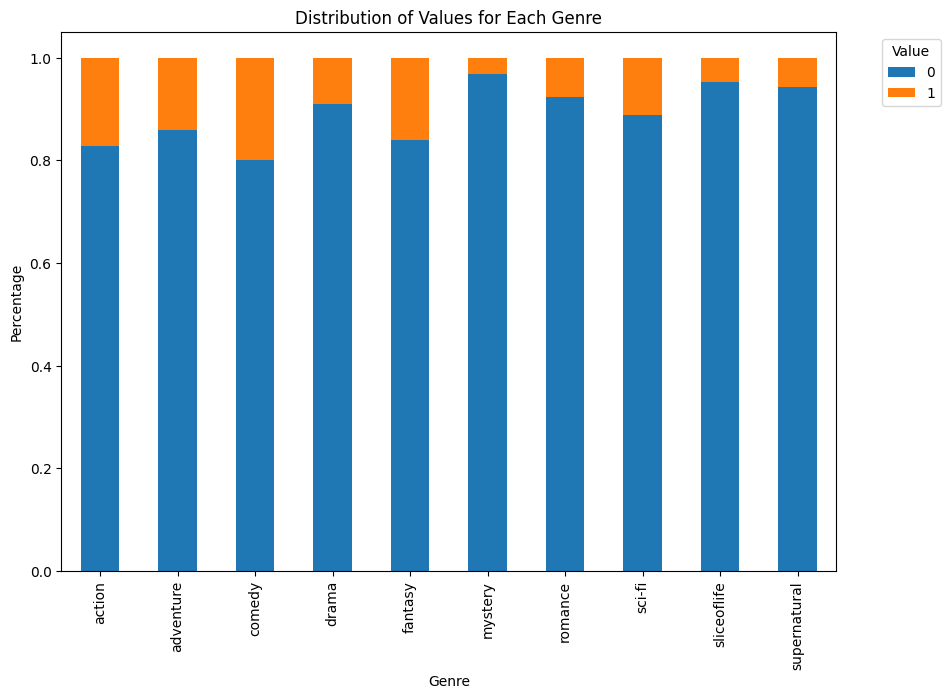

In [3]:
import matplotlib.pyplot as plt

# List of columns to plot
columns_to_plot = ['action', 'adventure', 'comedy', 'drama', 'fantasy', 'mystery', 'romance', 'sci-fi', 'sliceoflife', 'supernatural']

# Calculate the distribution of values for each column and plot a stacked bar chart
df_percentage = df[columns_to_plot].apply(lambda x: x.value_counts(normalize=True)).fillna(0).T

# Plotting
df_percentage.plot(kind='bar', stacked=True, figsize=(10, 7))
plt.title('Distribution of Values for Each Genre')
plt.xlabel('Genre')
plt.ylabel('Percentage')
plt.legend(title='Value', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



The genre that has the best balance comedy, so that will be our target variable.

In [13]:
from IPython.display import Image, display_html

# Get three random comedy anime
comedy_anime = df[df['comedy'] == 1].sample(3)

# Get three random non-comedy anime
non_comedy_anime = df[df['comedy'] == 0].sample(3)

# Display posters for comedy anime
comedy_html = "<h3>Comedy Anime:</h3>"
for index, row in comedy_anime.iterrows():
    comedy_html += f'<img src="{row["poster_url"]}" style="width:150px; margin:10px;">'

# Display posters for non-comedy anime
non_comedy_html = "<h3>Non-Comedy Anime:</h3>"
for index, row in non_comedy_anime.iterrows():
    non_comedy_html += f'<img src="{row["poster_url"]}" style="width:150px; margin:10px;">'

# Combine and display
display_html(comedy_html + "<br>" + non_comedy_html, raw=True)

Comedy Anime: Non-Comedy Anime: